In [0]:
import pandas as pd
import numpy as np
from datetime import datetime
import os
import json

In [2]:
! git clone 'https://github.com/CSSEGISandData/COVID-19.git'

Cloning into 'COVID-19'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17802 (delta 11), reused 15 (delta 9), pack-reused 17777
Receiving objects: 100% (17802/17802), 70.05 MiB | 10.83 MiB/s, done.
Resolving deltas: 100% (8995/8995), done.


In [0]:
daily_report_path = '/content/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/'
time_series_path = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series'

In [0]:
def keyFormat(month, date, year):
    return f"{month}-{date}-{year}"

def keyToDate(key):
    return map(int, key.split("-"))

def epochSecs(month, day, year):
    date = datetime(year, month, day)
    return (date - datetime.utcfromtimestamp(0)).total_seconds()

def epochSecsFile(filename, format=".csv"):
    month, day, year = map(int, filename[:-len(format)].split("-"))
    return epochSecs(month, day, year)

class KEYS:
    COUNTRY = "Country/Region"
    CONFIRMED = "Confirmed"
    DEATHS = "Deaths"
    RECOVERED = "Recovered"
    CUMULATIVE = "Cumulative"
    CURRENT = "Current"


In [10]:
data = {}

files = sorted(filter(lambda file: file.endswith(".csv"), os.listdir(daily_report_path)), key=epochSecsFile)

for file in files:

    print(f"for file {file}")
    month, date, year = map(int,file[:-4].split("-"))

    df = pd.read_csv(daily_report_path+file)
    df[[KEYS.CONFIRMED, KEYS.DEATHS, KEYS.RECOVERED]] = df[[KEYS.CONFIRMED, KEYS.DEATHS, KEYS.RECOVERED]].replace([np.NaN],[0])
    country_header = "Country_Region" if (month == 3 and date >= 22) or month >= 4 else "Country/Region"

    # daily basis record
    day_data = {}
    # for global record
    g_conf, g_death, g_recov = 0,0,0

    for index in df.index:
        country = df.loc[index][country_header]
        conf = int(df.loc[index][KEYS.CONFIRMED])
        death = int(df.loc[index][KEYS.DEATHS])
        recov = int(df.loc[index][KEYS.RECOVERED])

        # global record
        g_conf += conf
        g_death += death
        g_recov += recov

        # country record
        if country not in day_data:
            day_data[country] = {KEYS.CONFIRMED: 0,
                                 KEYS.DEATHS: 0,
                                 KEYS.RECOVERED: 0}
        day_data[country][KEYS.CONFIRMED] += conf
        day_data[country][KEYS.DEATHS] += death
        day_data[country][KEYS.RECOVERED] += recov

    # add global-data support
    day_data["GLOBAL"] = {KEYS.CONFIRMED: g_conf,
                          KEYS.DEATHS: g_death,
                          KEYS.RECOVERED: g_recov}

    # print(day_data)
    for country, cData in day_data.items():

        if country not in data:
            data[country]={KEYS.CUMULATIVE: {KEYS.CONFIRMED:0, KEYS.DEATHS:0, KEYS.RECOVERED:0}}
        
        prev_conf = data[country][KEYS.CUMULATIVE][KEYS.CONFIRMED]
        prev_death = data[country][KEYS.CUMULATIVE][KEYS.DEATHS]
        prev_recov = data[country][KEYS.CUMULATIVE][KEYS.RECOVERED]

        conf, death, recov = cData[KEYS.CONFIRMED], cData[KEYS.DEATHS], cData[KEYS.RECOVERED]

        data[country][keyFormat(month, date, year)]={KEYS.CUMULATIVE: {KEYS.CONFIRMED: conf, 
                                                                       KEYS.DEATHS: death, 
                                                                       KEYS.RECOVERED: recov},
                                                     KEYS.CURRENT: {KEYS.CONFIRMED: conf - prev_conf, 
                                                                    KEYS.DEATHS: death - prev_death, 
                                                                    KEYS.RECOVERED: recov - prev_recov}
                                                     }
        data[country][KEYS.CUMULATIVE] = data[country][keyFormat(month, date, year)][KEYS.CUMULATIVE].copy()


for file 01-22-2020.csv
for file 01-23-2020.csv
for file 01-24-2020.csv
for file 01-25-2020.csv
for file 01-26-2020.csv
for file 01-27-2020.csv
for file 01-28-2020.csv
for file 01-29-2020.csv
for file 01-30-2020.csv
for file 01-31-2020.csv
for file 02-01-2020.csv
for file 02-02-2020.csv
for file 02-03-2020.csv
for file 02-04-2020.csv
for file 02-05-2020.csv
for file 02-06-2020.csv
for file 02-07-2020.csv
for file 02-08-2020.csv
for file 02-09-2020.csv
for file 02-10-2020.csv
for file 02-11-2020.csv
for file 02-12-2020.csv
for file 02-13-2020.csv
for file 02-14-2020.csv
for file 02-15-2020.csv
for file 02-16-2020.csv
for file 02-17-2020.csv
for file 02-18-2020.csv
for file 02-19-2020.csv
for file 02-20-2020.csv
for file 02-21-2020.csv
for file 02-22-2020.csv
for file 02-23-2020.csv
for file 02-24-2020.csv
for file 02-25-2020.csv
for file 02-26-2020.csv
for file 02-27-2020.csv
for file 02-28-2020.csv
for file 02-29-2020.csv
for file 03-01-2020.csv
for file 03-02-2020.csv
for file 03-03-2

In [11]:
# print(json.dumps(data, indent=4))
data["GLOBAL"][keyFormat(4,3,2020)]

{'Cumulative': {'Confirmed': 1095917, 'Deaths': 58787, 'Recovered': 225796},
 'Current': {'Confirmed': 82760, 'Deaths': 5804, 'Recovered': 15533}}

In [0]:
date = datetime.now()
with open(f"covid19_{date.month}_{date.day}_{date.year}.json","w") as file:
    file.write(json.dumps(data))

In [0]:
import matplotlib.pyplot as plt

In [0]:
# put Country name ex. India, US, GLOBAL for global analysis
COUNTRY_NAME = "GLOBAL"

cumm_conf, conf = [], []
cumm_death, death = [], []
cumm_recov, recov =[], []

sortedKeys = sorted( filter(lambda x:x!=KEYS.CUMULATIVE, data[COUNTRY_NAME]), key=lambda x:epochSecs(*keyToDate(x)))
for key in sortedKeys:
    conf.append(data[COUNTRY_NAME][key][KEYS.CURRENT][KEYS.CONFIRMED])
    death.append(data[COUNTRY_NAME][key][KEYS.CURRENT][KEYS.DEATHS])
    recov.append(data[COUNTRY_NAME][key][KEYS.CURRENT][KEYS.RECOVERED])

    cumm_conf.append(data[COUNTRY_NAME][key][KEYS.CUMULATIVE][KEYS.CONFIRMED])
    cumm_death.append(data[COUNTRY_NAME][key][KEYS.CUMULATIVE][KEYS.DEATHS])
    cumm_recov.append(data[COUNTRY_NAME][key][KEYS.CUMULATIVE][KEYS.RECOVERED])


In [0]:
def plotBarChart(countryName, figureTitle, yValues1, yValues2):
    plt.figure(figureTitle,figsize=(40,20))
    plt.subplot(211)
    plt.title(f"Daily Basis {figureTitle} of {countryName}")
    plt.bar(sortedKeys, yValues1)
    plt.grid(True)
    plt.xticks(rotation='vertical')

    plt.subplot(212)
    plt.title(f"Cumulative {figureTitle} of {countryName}")
    plt.bar(sortedKeys, yValues2)
    plt.grid(True)
    plt.xticks(rotation='vertical')

    plt.show()


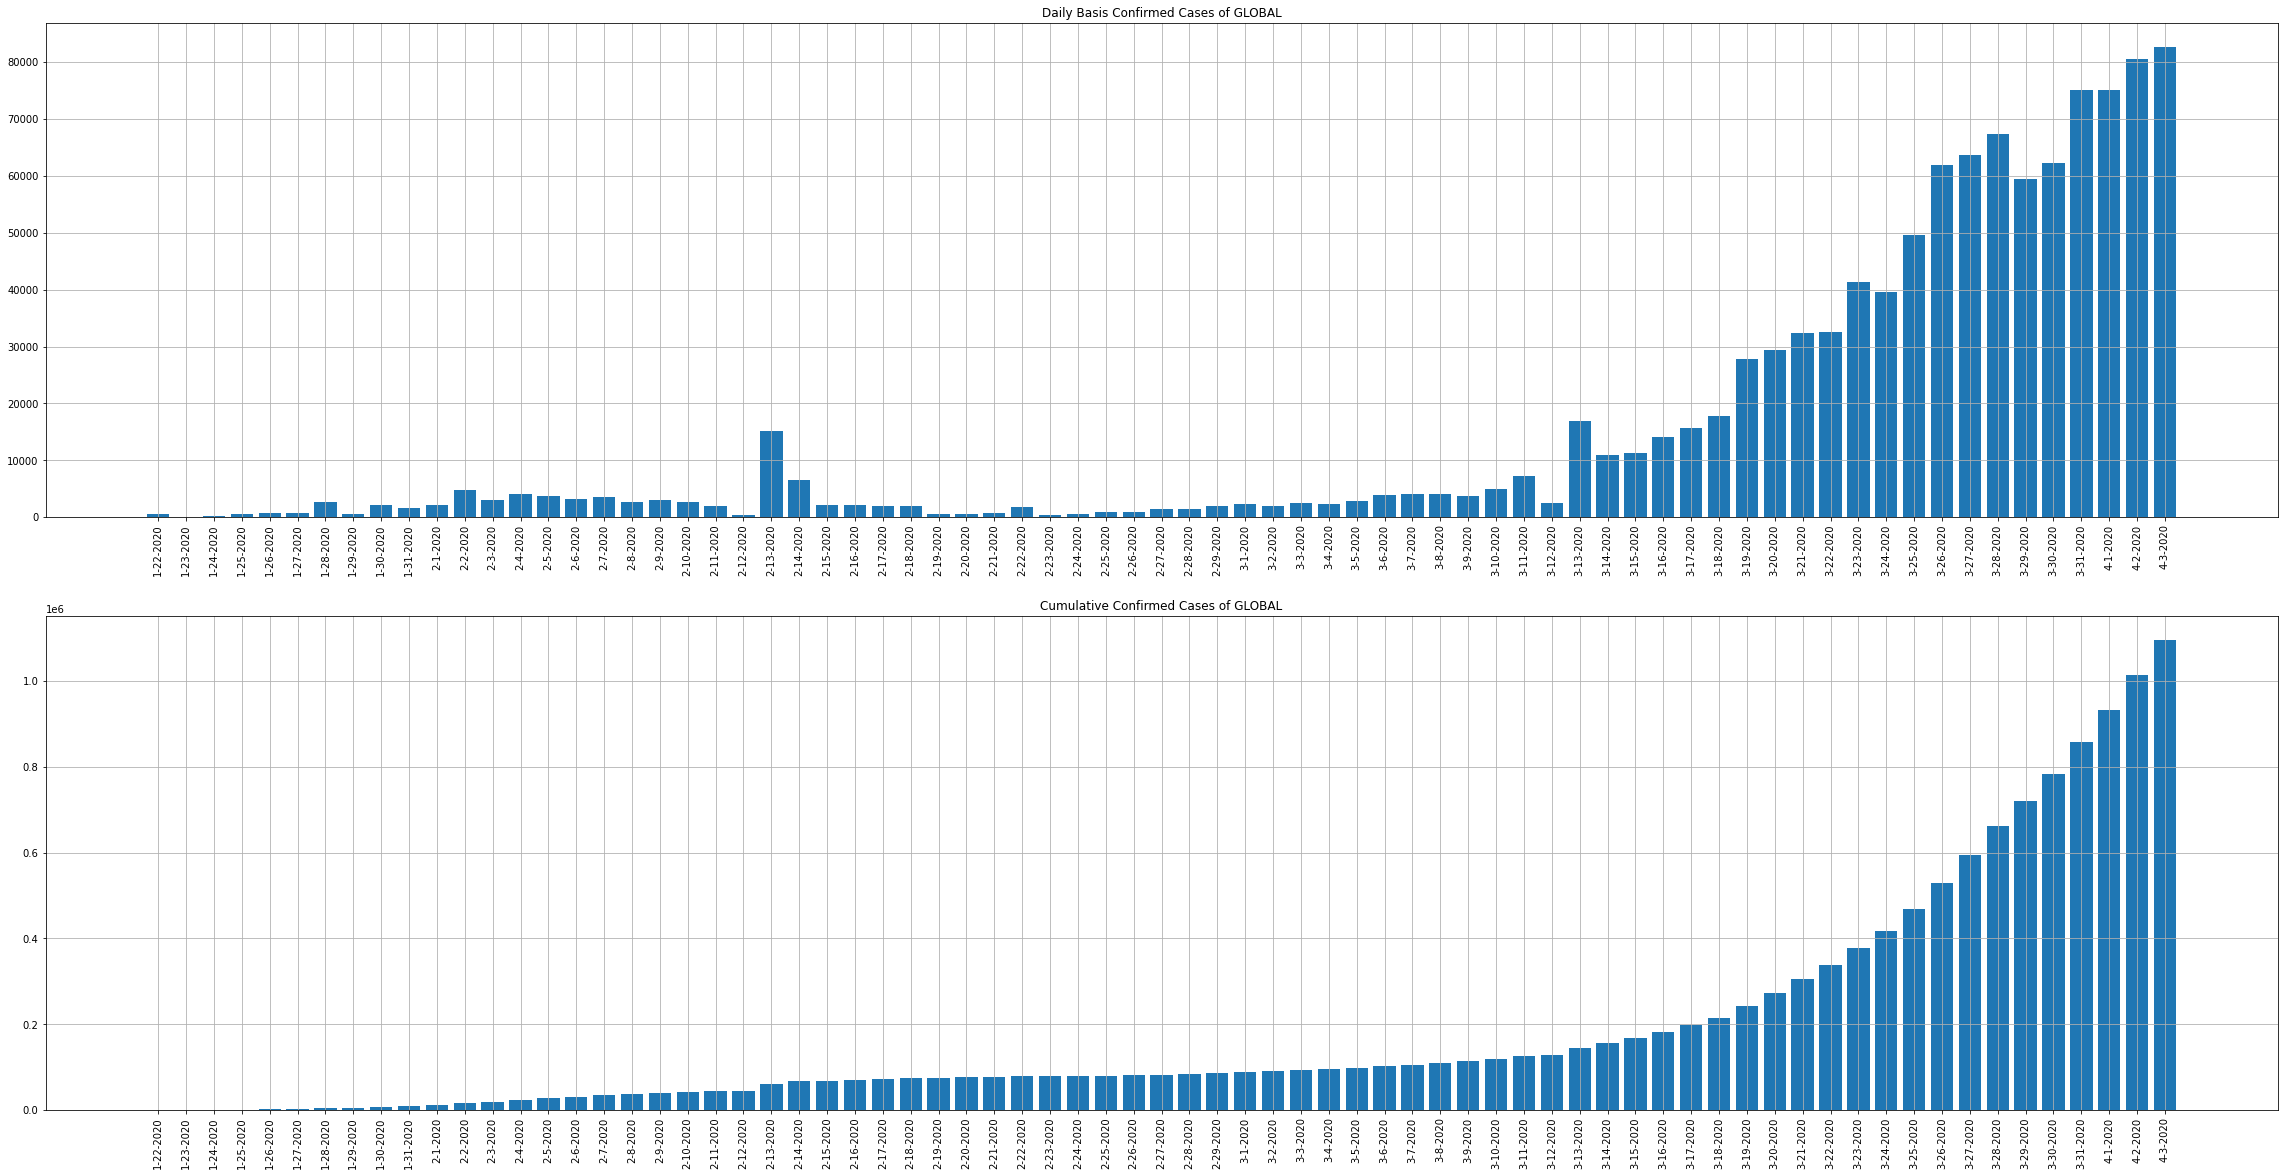

In [44]:
plotBarChart(COUNTRY_NAME, "Confirmed Cases", conf, cumm_conf)

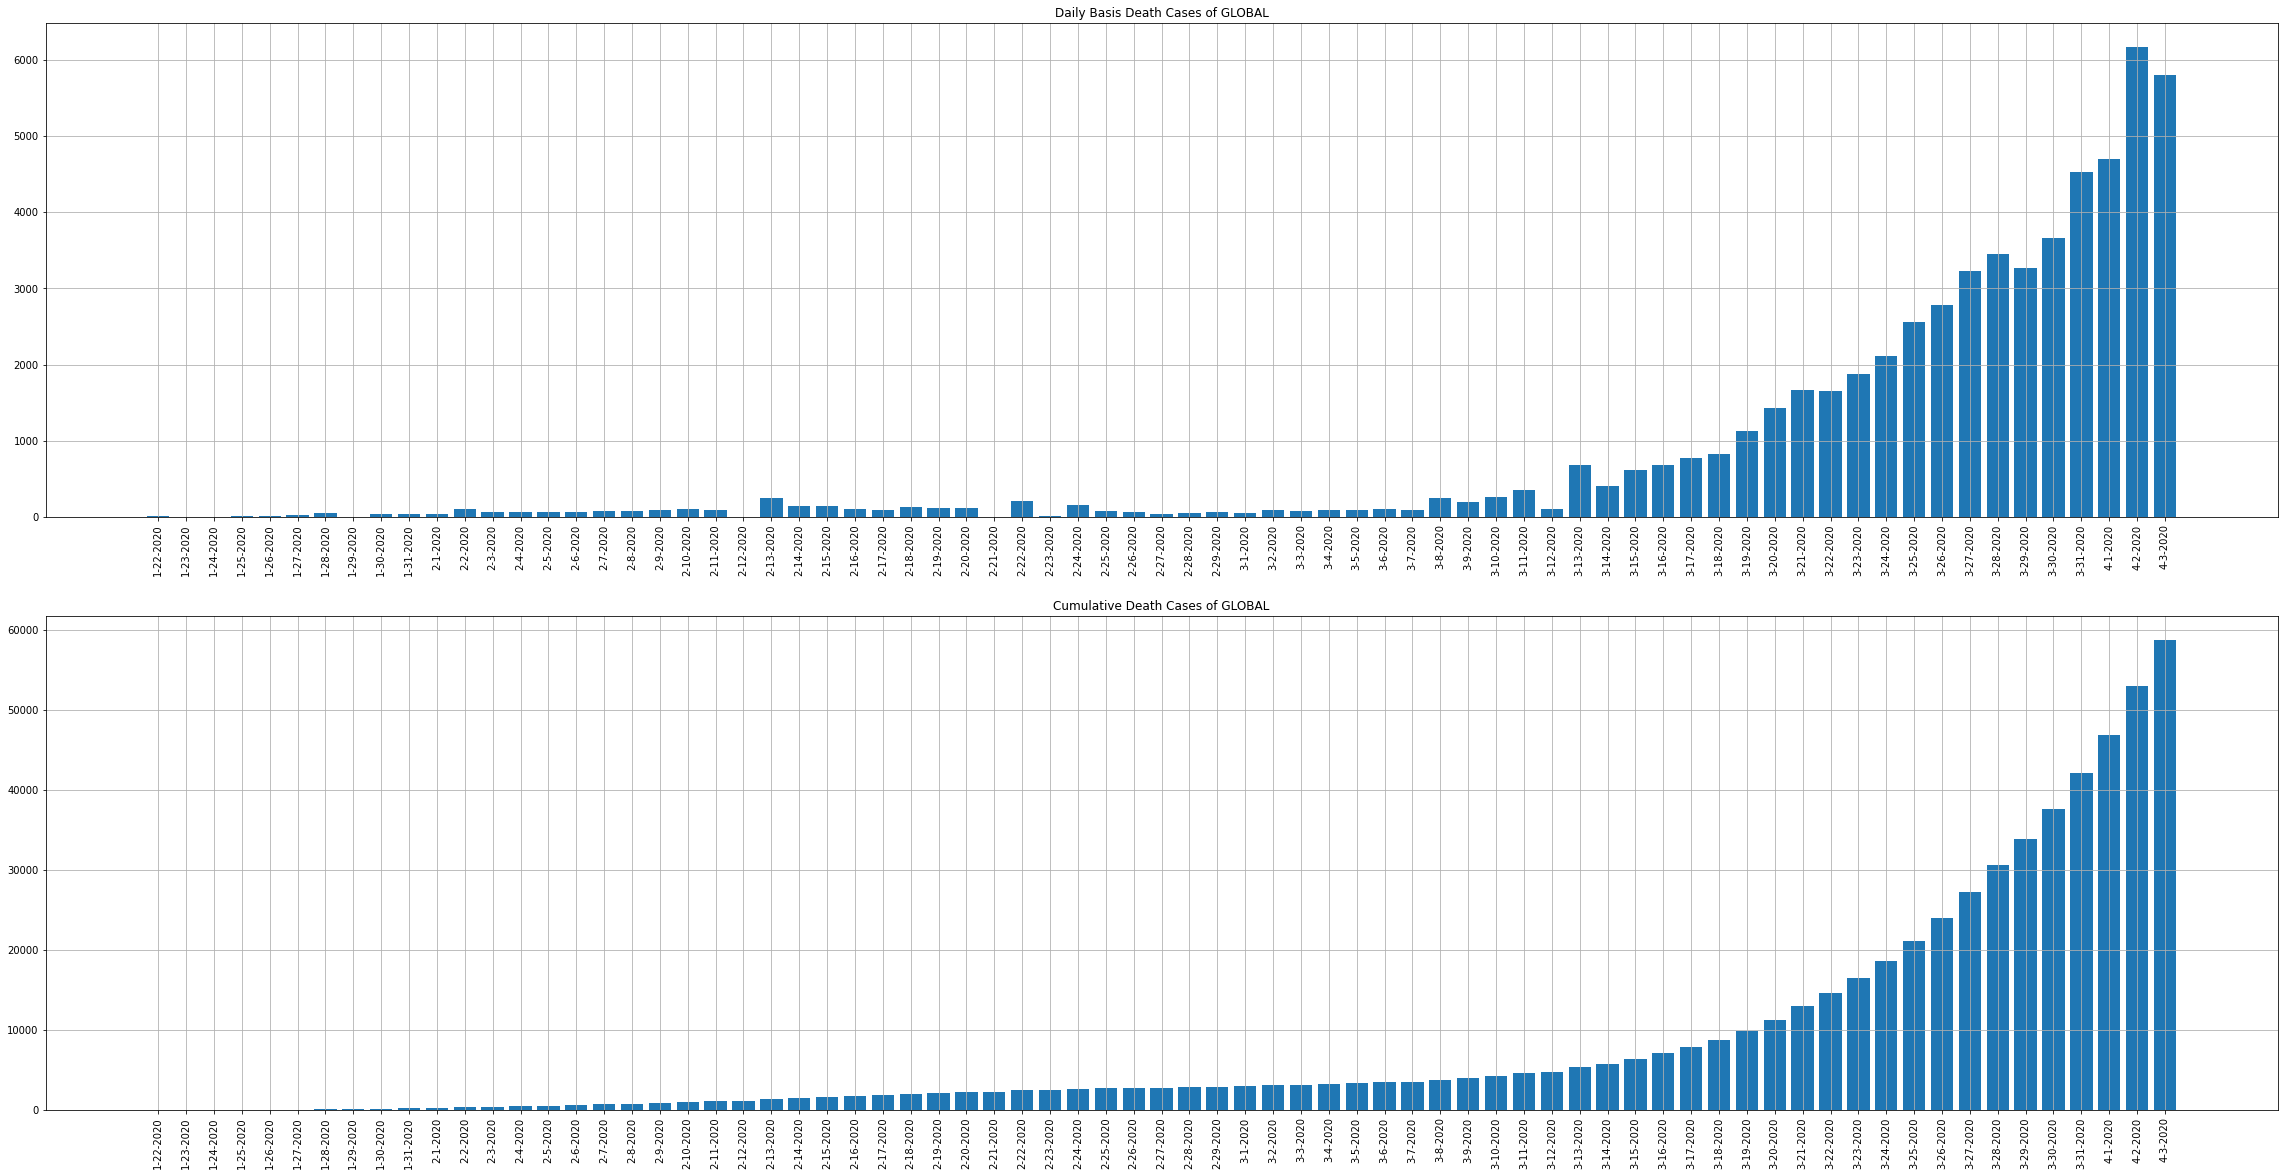

In [45]:
plotBarChart(COUNTRY_NAME, "Death Cases", death, cumm_death)

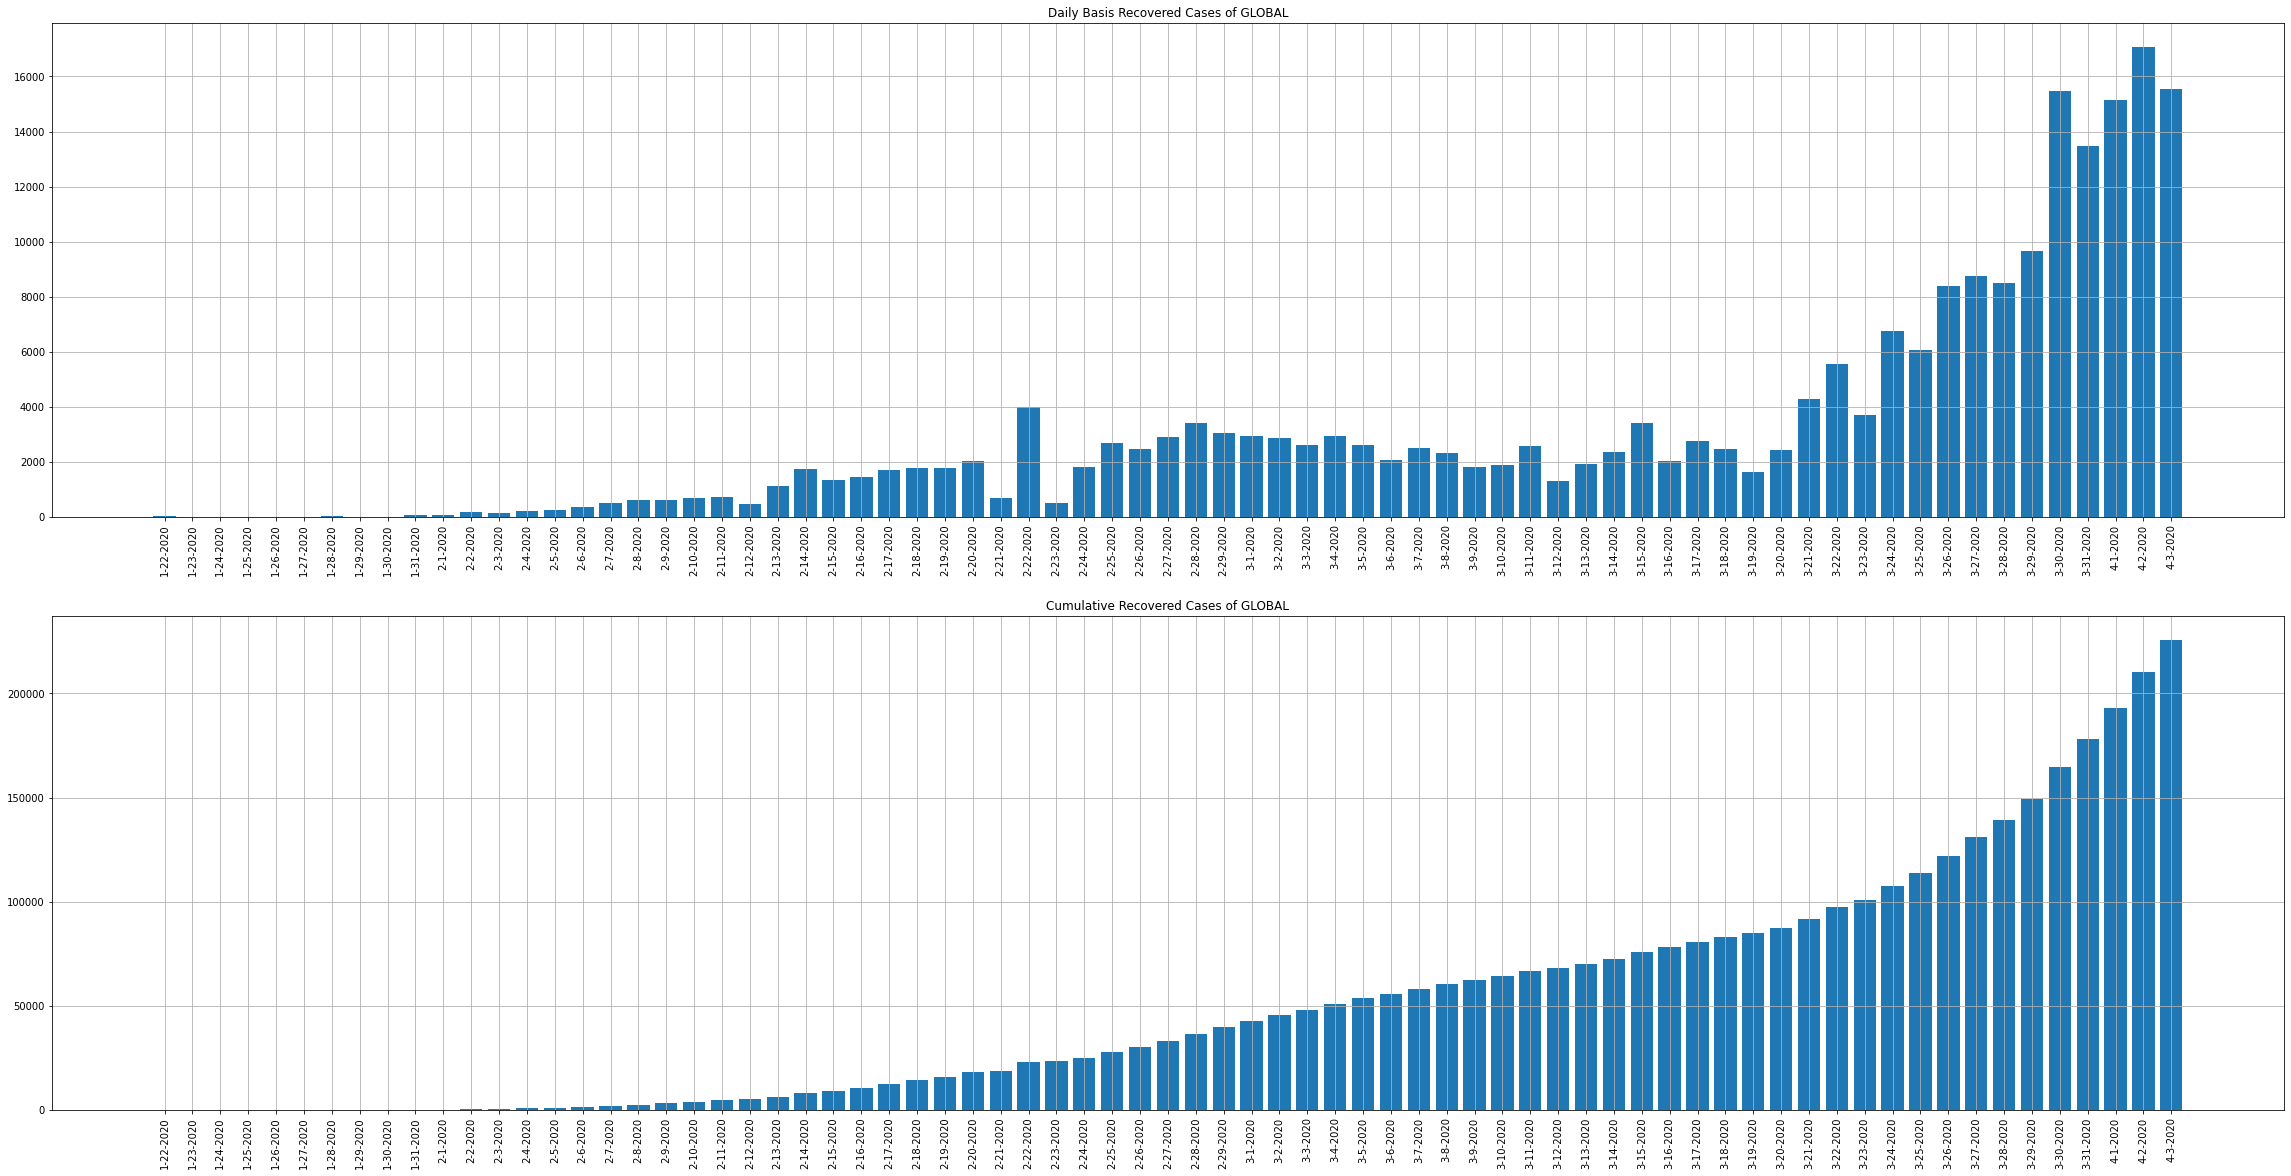

In [46]:
plotBarChart(COUNTRY_NAME, "Recovered Cases", recov, cumm_recov)

In [0]:
help(json.dumps)